# SI 618: Data Manipulation and Analysis
## Dimensionality Reduction
### Ceren Budak, School of Information, University of Michigan


# Dimensionality Reduction Methods

* A set of  useful and important tools for exploring data with many variables.
* There are two main tools for dimensionality reduction:
    * Principal Components Analysis (PCA)
        * PCA projects data to lower dimensions. PCA extracts all variance.
    * Exploratory Factor Analysis (EFA)
        * EFA seeks to find a small number of unobserved underlying variables that might explain the common variance (not all variance) in the data.
*  The goal of dimensionality reduction methods is to "explain" many observed variables in terms of a much smaller number of unobserved variables.

## Let's start with a motivating example

### Consider an athlete competing in a set of events (e.g. heptathlon)
<img src="resources/dimExample.png" alt="" title="" />

Say we observe their score in each event = variable.

**Question: Given a particular athlete, is their score in one event completely unrelated to their score in other events?**

<img src="resources/dimExample2.png" alt="" title="" />

We might be able to describe an athlete's abilities in terms of a smaller number of factors that strongly influence their scores in all events.

<img src="resources/dimExample3.png" alt="" title="" />

**What are three possible factors you could hypothesize?**

## Looking at your data  from a lower dimensional perspective

* Factor variables: 
    * F1       :  ... ability (-1 to 1)
    * F2     :  ... ability  (-1 to 1)
    * F3 :  ... ability (-1 to 1)
* Goal: Rewrite our data in terms of the factor variables
* The factor loadings are the weights that relate the observed variables to the factor variables in a linear model
    * Score(i) = w1 * F1(i)+ w2 * F2(i)+ w3 * F3(i)
    
### As I mentioned we will cover two ways  to do this:  PCA and EFA

Let's start with PCA...

## Principal Components Analysis (PCA): Why is it used?

- Identify combinations of variables that explain most of the variation in the data
- Compress high-dimensional datasets to a few dimensions
- Filter noise from data (as a result of the approximation)

## Towards Principal Component Analysis (PCA)
Here's a hypothetical 2-dimensional distribution of two variables:

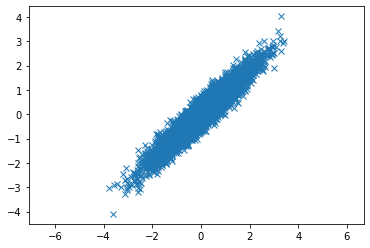

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

mean = [0, 0]
cov = [[1.1, 1], [1, 1]]  

#Simulate a multivariate normal distribution
x, y = np.random.multivariate_normal(mean, cov, 5000).T

plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

Each point is described with (x,y) coordinates.  Suppose to save space you only had enough memory to store 1 number per point instead of 2.  What number would you store to best approximate a point's position?

**Basic idea: Collapse the 2-D cloud to 1 dimension, then approximate a point (xi, yi) by its projected position onto the line.**
<img src="resources/pca1.png" alt="" title="" />

**But how do we pick the 'best' linear approximation?  This is what PCA does!!**
<img src="resources/pca2.png" alt="" title="" />

**We can repeat this process to improve the approximation.**
- In what direction is the next highest variance in the data? This will give us the second principal component.
<img src="resources/pca3.png" alt="" title="" />

Let's apply PCA to our toy dataset: 

In [2]:
import sklearn.decomposition as skd
mean = [0, 0]
cov = [[1.1, 1], [1, 1]]  

#Simulate a multivariate normal distribution
toy = np.random.multivariate_normal(mean, cov, 5000)

pca_model = skd.PCA().fit(toy)
print("Compontents are", pca_model.components_)

print("You can see that the two dimensions are orthogonal to each other.")

Compontents are [[ 0.72572506  0.68798484]
 [ 0.68798484 -0.72572506]]
You can see that the two dimensions are orthogonal to each other.


# Now let's go back to the athletes and apply PCA

## Import packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook")  # make figures fit
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import sklearn.preprocessing as skp


## Load and Inspect the Data

In [4]:
df_hept = pd.read_csv('data/heptathlon.csv')
df_hept = df_hept.set_index('Athlete')
df_hept.head()

,Hurdles,HighJump,Shot,Run200m,LongJump,Javelin,Run800m,Score
Athlete,,,,,,,,
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [5]:
# Let's print out summary information to check the data quality 
# and structure.
df_hept.describe()

,Hurdles,HighJump,Shot,Run200m,LongJump,Javelin,Run800m,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.840000,1.782000,13.117600,24.649200,6.152400,41.482400,136.054000,6090.600000
std,0.736648,0.077942,1.491884,0.969557,0.474212,3.545656,8.291088,568.469729
min,12.690000,1.500000,10.000000,22.560000,4.880000,35.680000,124.200000,4566.000000
25%,13.470000,1.770000,12.320000,23.920000,6.050000,39.060000,132.240000,5746.000000
50%,13.750000,1.800000,12.880000,24.830000,6.250000,40.280000,134.740000,6137.000000
75%,14.070000,1.830000,14.200000,25.230000,6.370000,44.540000,138.480000,6351.000000
max,16.420000,1.860000,16.230000,26.610000,7.270000,47.500000,163.430000,7291.000000


### Question: Should "score" be included in these analyses?

For now, let's omit the "score" column

In [6]:
score = df_hept[['Score']]
df_hept.drop('Score',inplace=True, axis=1)

## 2.1 Rescaling the Data
Let us normalize the data by computing the "[z-scores](https://en.wikipedia.org/wiki/Standard_score#Calculation_from_raw_score)" of the values. This step of normalization (rescaling) is important to PCA.

Given a column x, the z-scores of the elements in x is simply

    (x - mean(x)) / std(x)
    
where, `std` means standard deviation.

In [7]:
df_hept_norm = df_hept.copy()
df_hept_norm.iloc[:,:7] = skp.scale(df_hept_norm.iloc[:,:7].astype(np.float))
df_hept_norm.head()

,Hurdles,HighJump,Shot,Run200m,LongJump,Javelin,Run800m
Athlete,,,,,,,
Joyner-Kersee (USA),-1.593317,1.021376,1.835071,-2.199232,2.405348,1.202526,-0.928655
John (GDR),-1.371639,0.235702,2.129240,-1.051825,1.200091,0.310188,-1.222861
Behmer (GDR),-0.886716,0.628539,0.740486,-1.630792,1.135524,0.880133,-1.459210
Sablovskaite (URS),-0.318663,0.235702,1.445125,-0.767605,0.210059,0.373515,-0.469498
Choubenkova (URS),-0.457213,-0.549972,1.123591,-0.757078,0.360716,1.720658,-1.003745


In [8]:
# confirm the mean/std are 0/1
df_hept_norm.describe()

,Hurdles,HighJump,Shot,Run200m,LongJump,Javelin,Run800m
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000
mean,2.131628e-16,3.055334e-15,3.463896e-16,-4.352074e-16,-2.486900e-16,-1.589839e-15,0.000000
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621
min,-1.593317e+00,-3.692669e+00,-2.132797e+00,-2.199232e+00,-2.738515e+00,-1.670227e+00,-1.459210
25%,-5.126326e-01,-1.571348e-01,-5.456503e-01,-7.676047e-01,-2.203898e-01,-6.972903e-01,-0.469498
50%,-1.246944e-01,2.357023e-01,-1.625458e-01,1.903222e-01,2.100590e-01,-3.461121e-01,-0.161751
75%,3.186635e-01,6.285394e-01,7.404863e-01,6.113890e-01,4.683283e-01,8.801333e-01,0.298637
max,3.574573e+00,1.021376e+00,2.129240e+00,2.064069e+00,2.405348e+00,1.732172e+00,3.369945


# 2. Bivariate Analysis (Quick Review)


## 2.2 Bivariate Analysis
For initial inspection of bivariate relationships among the variables, let us create a correlation plot.

In [9]:
# test for correlations
df_hept_norm.corr()

,Hurdles,HighJump,Shot,Run200m,LongJump,Javelin,Run800m
Hurdles,1.000000,-0.811403,-0.651335,0.773721,-0.912134,-0.007763,0.779257
HighJump,-0.811403,1.000000,0.440786,-0.487664,0.782442,0.002153,-0.591163
Shot,-0.651335,0.440786,1.000000,-0.682670,0.743073,0.268989,-0.419620
Run200m,0.773721,-0.487664,-0.682670,1.000000,-0.817205,-0.333043,0.616810
LongJump,-0.912134,0.782442,0.743073,-0.817205,1.000000,0.067108,-0.699511
Javelin,-0.007763,0.002153,0.268989,-0.333043,0.067108,1.000000,0.020049
Run800m,0.779257,-0.591163,-0.419620,0.616810,-0.699511,0.020049,1.000000


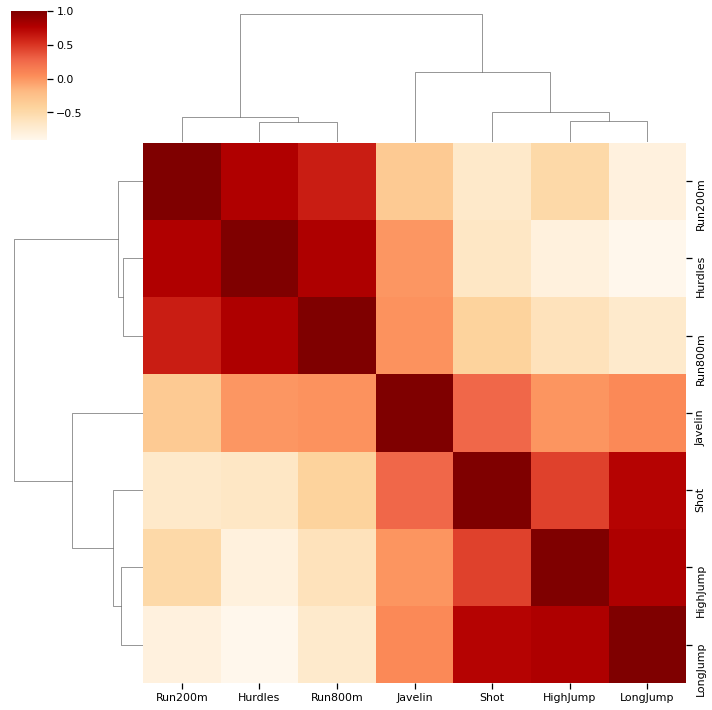

In [10]:
# draw a "clustered" heatmap
sns.clustermap(df_hept_norm.corr(),cmap=plt.cm.OrRd)

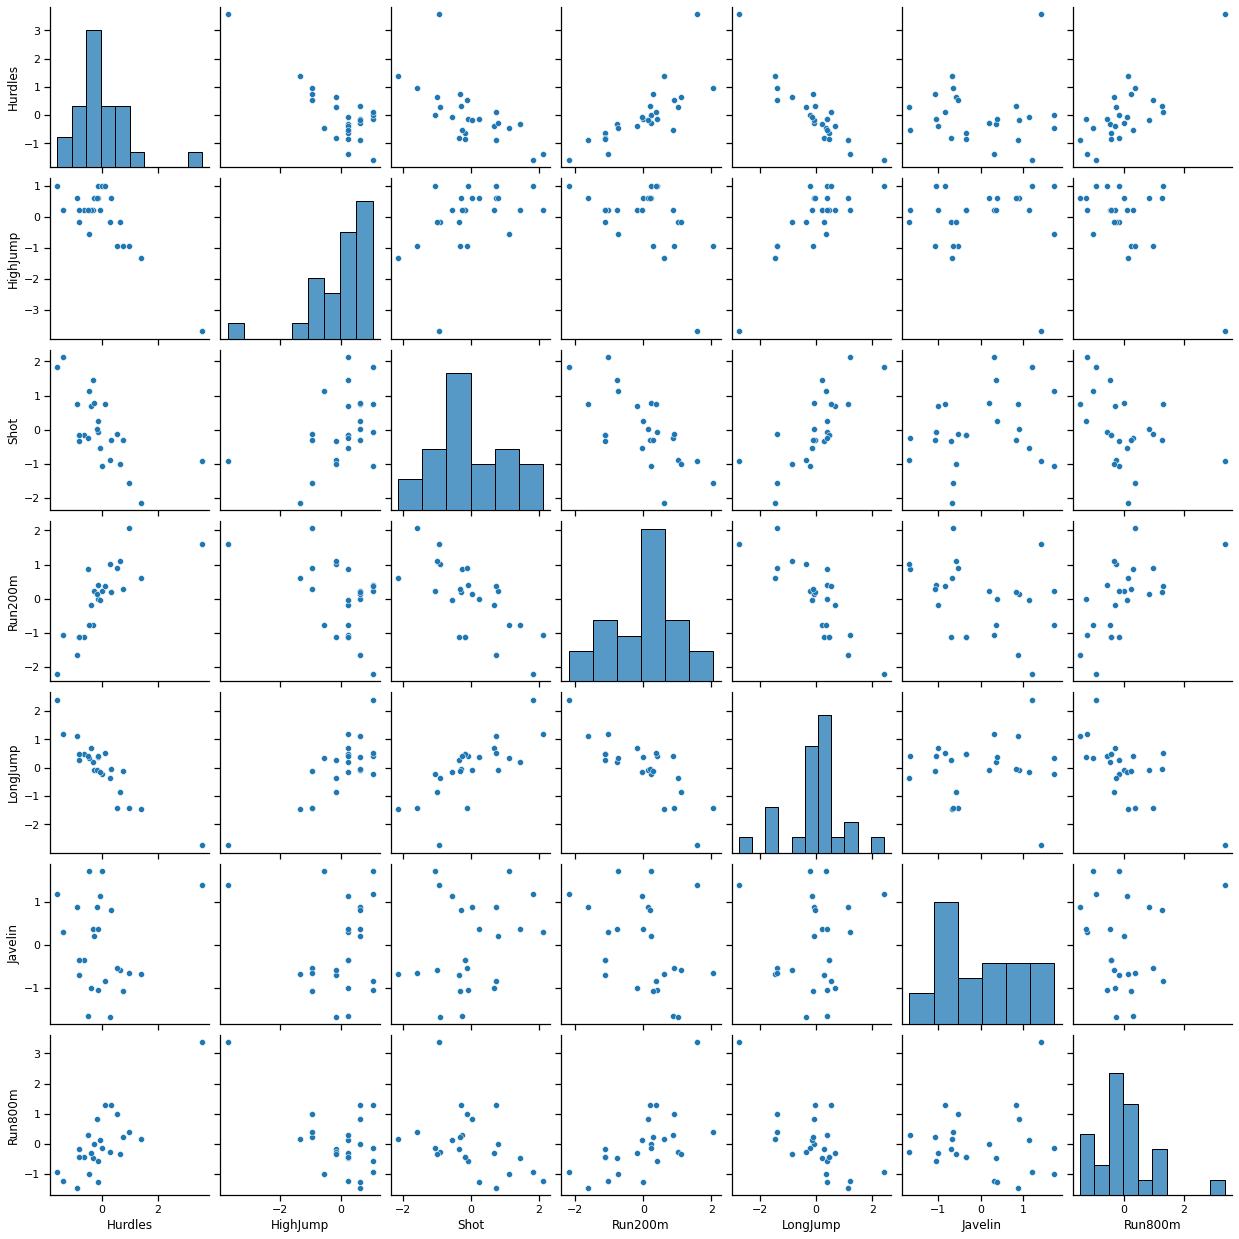

In [11]:
# pairplot
sns.pairplot(df_hept_norm)

### <font color="magenta">Questions for the class:</font>

* What patterns do you see? Which measures are correlated with each other? 
   * Clear linear relationships between hurdles, high jump, shot put, 200m, and long jump.
   * Javelin and, to some extent, 800m results are less correlated with the other events.
* Any initial suggestions on underlying factors?


# 2. Principal Component Analysis

We have demonstrated how to use principal component analysis (PCA) to do dimensionality reduction for visualization in the previous class. Now let us look at PCA in greater details.

In [12]:
# Create a PCA model
pca_model = skd.PCA().fit(df_hept_norm.iloc[:,:7])

In [13]:
# There are 7 components extracted from the data; each component is
# a 7-dimensional vector.
# These are also sometimes referred to as rotations (or rather the transpose)
pca_model.components_.shape

(7, 7)

In [14]:
pca_model.components_

array([[ 0.45287105, -0.37719923, -0.3630725 ,  0.40789504, -0.45623185,
        -0.075409  ,  0.37495938],
       [ 0.15792058, -0.24807386,  0.28940743, -0.26038545, -0.05587394,
         0.84169212,  0.22448984],
       [-0.04514996,  0.36777902, -0.67618919,  0.08359211, -0.13931653,
         0.47156016, -0.39585671],
       [-0.02653873,  0.67999172,  0.12431725,  0.3610658 ,  0.11129249,
         0.12079924,  0.6034113 ],
       [-0.09494792, -0.01879888, -0.51165201, -0.64983404,  0.1842981 ,
        -0.13510669,  0.50432116],
       [-0.78334101, -0.09939981,  0.05085983,  0.02495639, -0.59020972,
         0.02724076,  0.1555552 ],
       [-0.38024707, -0.43393114, -0.21762491,  0.45338483,  0.61206388,
         0.17294667,  0.09830963]])

These tell us the PC loadings of the variables

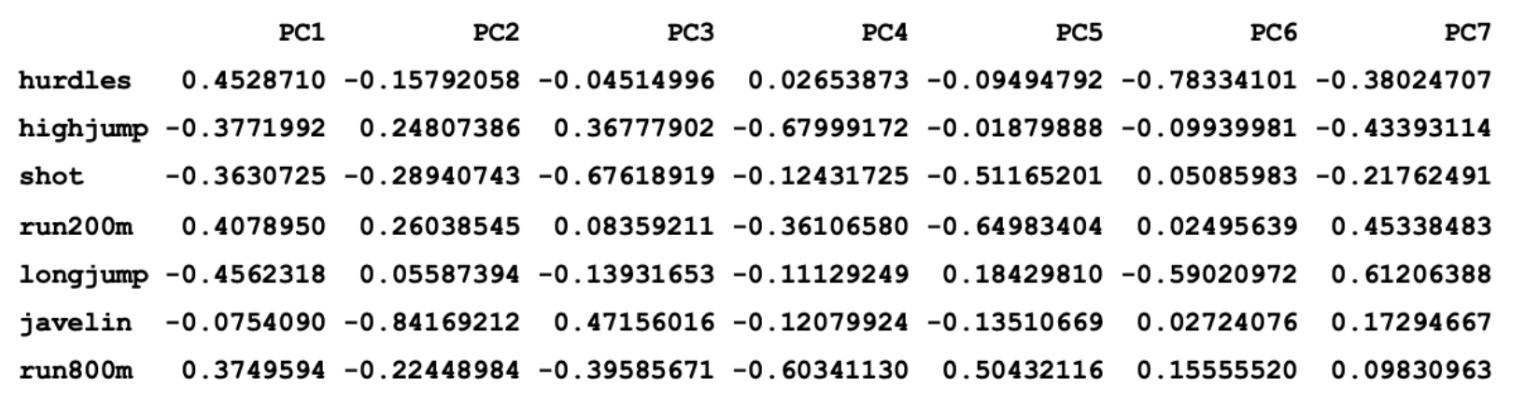

* This is essentially the transformation from event space to principle component space.
* Bigger numbers mean a variable(event) is more important in determining the score along the first principal component
* Component 1 seems to have a little bit of everything except for javelin
* Component 2 has a strong (negative) loading on javelin ability.
* Component 3 seems to cover shot put ability.

In [15]:
# Look at the variances explained by each component.
# These values equal to the eigenvalues of the correlation matrix.
pca_model.explained_variance_

array([4.64611996, 1.24408391, 0.54272305, 0.47621544, 0.25548619,
       0.0759954 , 0.05104272])

One way of determining the number of principal components to retain is to look at the explained variance as shown above, and drop those principal components whose explained variance is smaller than 1.

Another way is to create a __Scree Plot__ as below, and find the "elbow" point on the plotted curve.

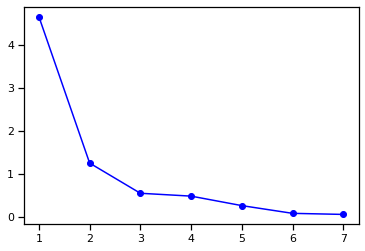

In [16]:
# A "scree" plot.
plt.plot(range(1,8),pca_model.explained_variance_,'b-o')

Next we will create a __biplot__, which is 2-D scatterplot showing all the data points as well as the data variables in the space defined by the first two principal components.

* A biplot shows:
    * The data points
    * The variables 
* Data are plotted as "seen" from the PC axes
* Variables are plotted by their PC loadings
* The angle formed by the vectors for any two variables reflects their actual pairwise correlation

In [17]:
X = pca_model.transform(df_hept_norm.iloc[:,:7])
X

array([[-4.20643487e+00,  1.26802363e+00, -3.77540969e-01,
         2.34760555e-02,  4.34790795e-01, -3.46326436e-01,
         3.55095715e-01],
       [-2.94161870e+00,  5.34525607e-01, -9.15920066e-01,
        -4.85255922e-01, -7.17563613e-01,  2.42996831e-01,
         1.46985484e-01],
       [-2.70427114e+00,  6.92759007e-01,  4.68645234e-01,
        -6.93643036e-01,  1.07701186e-01, -2.44122993e-01,
        -1.32321187e-01],
       [-1.37105209e+00,  7.06558619e-01, -6.07545350e-01,
        -1.43571252e-01, -4.63288490e-01,  9.36987374e-02,
        -4.96611559e-01],
       [-1.38704979e+00,  1.78931718e+00,  1.53808834e-01,
        -8.53187909e-01, -7.01365286e-01,  1.28908447e-01,
         2.44420338e-01],
       [-1.06537236e+00, -8.10446879e-02,  6.88439798e-01,
        -2.09811585e-01, -7.53150239e-01, -3.63126022e-01,
        -1.05546792e-01],
       [-1.12307639e+00, -3.30429058e-01,  7.49458898e-02,
        -4.96305896e-01,  7.78724656e-01,  8.65940445e-02,
        -1.4581772

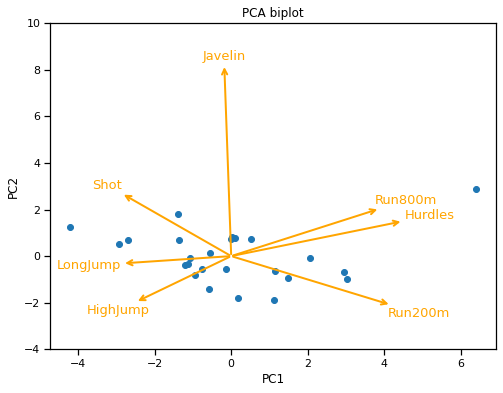

In [18]:
# Scatterplot of disaggregated data
pca_model = skd.PCA().fit(df_hept_norm.iloc[:,:7])
X = pca_model.transform(df_hept_norm.iloc[:,:7])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
plt.ylim(-4, 10)

# Add variable unit vector projections
V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(df_hept_norm.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

Note that some challenges are measured in seconds (lower numbers better), others in metres (higher numbers better). In order to get all of the scores pointing in the same direction, you can transform the times to be differences from the slowest time and repeat the same process. 

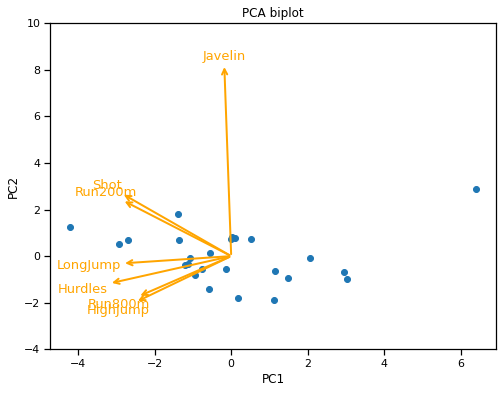

In [19]:
df_hept['Hurdles'] = max(df_hept['Hurdles']) - df_hept['Hurdles']
df_hept['Run200m'] = max(df_hept['Run200m']) - df_hept['Run200m']
df_hept['Run800m'] = max(df_hept['Run800m']) - df_hept['Run800m']
df_hept_norm = df_hept.copy()
df_hept_norm.iloc[:,:7] = skp.scale(df_hept_norm.iloc[:,:7].astype(np.float))
pca_model = skd.PCA().fit(df_hept_norm.iloc[:,:7])

X = pca_model.transform(df_hept_norm.iloc[:,:7])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
plt.ylim(-4, 10)

# Add variable unit vector projections
V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(df_hept_norm.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

## Interpretations

* Points close = Observations with similar component projections

* Vectors close = Variables that are correlated

* Observations whose points project furthest in the direction of a variable have the most of whatever the variable measures.


### <font color="magenta">Questions for the class:</font>

* What patterns do you see? What are some underlying factors, you think?
* What's the correlation between PC1 and *Score* from the original data?

## What is happening under the hood?

* Given a matrix with Xs and Ys, first remove Ys (this was us removing the score column)
* Given matrix X, create matrix Z that is centered and scaled

You do the two steps above. The ones below are under the hood: 
* Given Z, find covariance by computing Z<sup>T</sup>Z
* Apply eigenvalue decomposition to this covariance matrix  (PDP<sup>-1</sup>)
* Reorder P (eigenvectors) from those with most to least significance (D vector provides this), let’s call this P*
* Now we can represent our original data as Z* = ZP*. Given that eigenvectors (Ps) are independent from/orthogonal to each other, same applies to columns of Z

## PCA in a nutshell

PCA is a method that brings together:
* A measure of how each variable is associated with one another. (Covariance matrix.)
* The directions in which our data are dispersed. (Eigenvectors.)
* The relative importance of these different directions. (Eigenvalues.)

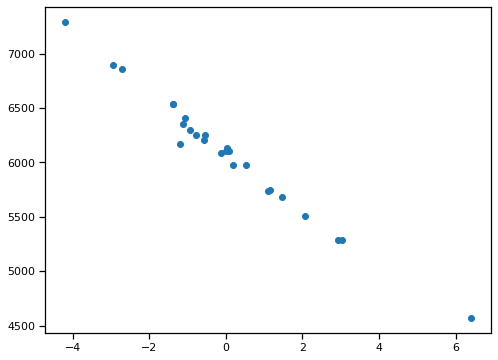

In [20]:
X = pca_model.transform(df_hept_norm.iloc[:,:7])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],score)

# 3. Factor Analysis

Factor analysis is similar to PCA but we have a little bit more control over the factors and how they relate to each other.

## Exploratory factor analysis: recall our original goal!

<img src="resources/efaExample.png" alt="" title="" />

## Exploratory factor analysis

* Finds k factors that "explain" the correlation structure in the observed variables
* You must specify k
* You can specify whether the factors can be correlated or uncorrelated
* More flexible and general than PCA


<img src="resources/efaExample2.png" alt="" title="" />

## Factors in the hepthalon


<img src="resources/efaExample3.png" alt="" title="" />

### Let's practice using Python

Below, we'll create 3 factors for the events and then print out their loadings.  That tells us how much each event contributs to each factor. We will also print communalities. These describe how much of the variance for a given variable is explained by the factors. For instance, below we see that about 98% of the hurdles variance was contributed by the 3 common factors.

           Factor1   Factor2   Factor3
Hurdles   0.983577 -0.075221  0.102677
HighJump  0.781252 -0.211995  0.187978
Shot      0.333813  0.393493  0.456242
Run200m   0.628184  0.614220 -0.069516
LongJump  0.819078  0.061514  0.308398
Javelin  -0.174710  0.535196  0.099988
Run800m   0.850762 -0.068944 -0.117963
[0.9836247  0.69063234 0.47442452 0.77671389 0.76978116 0.32695621
 0.74246527]


(array([3.50903316, 0.87767495, 0.37788999]),
 array([0.50129045, 0.12538214, 0.05398428]),
 array([0.50129045, 0.62667259, 0.68065687]))

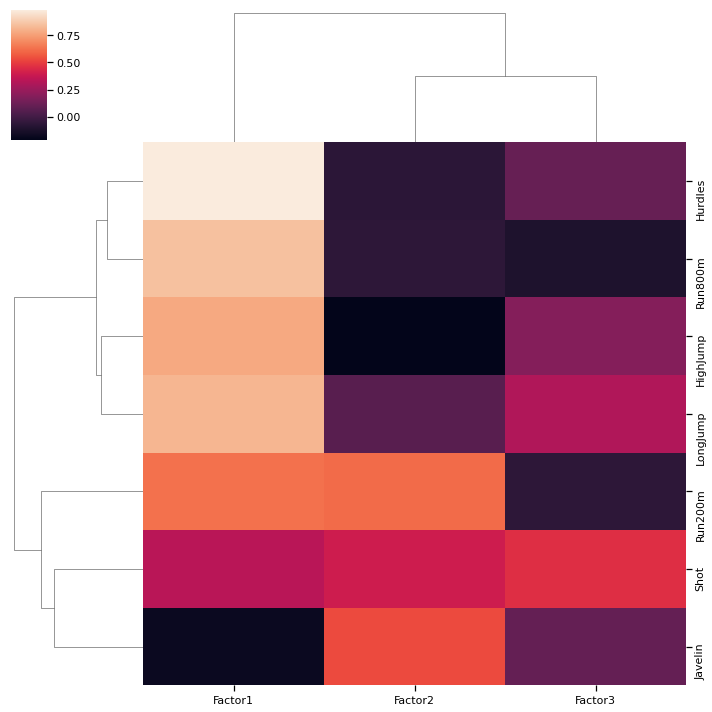

In [22]:
# You will need to pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df_hept_norm.iloc[:,:7], 3)

loads = fa.loadings_
loadsdf = pd.DataFrame(loads, columns=["Factor1","Factor2","Factor3"],index=df_hept_norm.columns)
print(loadsdf)
sns.clustermap(loadsdf)

communalities = fa.get_communalities()
print(communalities)

fa.get_factor_variance()
# This will print:
# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance

With EFA, you can specify rotation in addition to the number of factors. Simply put, the idea of rotation is to rotate the factors in order to achieve a simpler and more interpretable structure. Simple structure means that "each factor should have a few high loadings with the rest of the loading being zero or close to zero".

Rotation methods are either orthogonal (factors are uncorrelated) or oblique (factors are correlated).

The default rotation for FactorAnalyzer is promax (oblique). 

Let's next use varimax which aims to set orthogonal factors. 

           Factor1   Factor2   Factor3
Hurdles   0.981393  0.129853  0.120269
HighJump  0.782382 -0.024378  0.211981
Shot      0.519742  0.539847  0.392174
Run200m   0.703624  0.704098 -0.121386
LongJump  0.899271  0.274908  0.296471
Javelin  -0.052585  0.511935  0.033792
Run800m   0.791888  0.066600 -0.090047
[0.9944593  0.6576509  0.71536704 1.00557461 0.97215671 0.2659844
 0.63963116]


(array([3.77901211, 1.14673191, 0.3250801 ]),
 array([0.53985887, 0.16381884, 0.04644001]),
 array([0.53985887, 0.70367772, 0.75011773]))

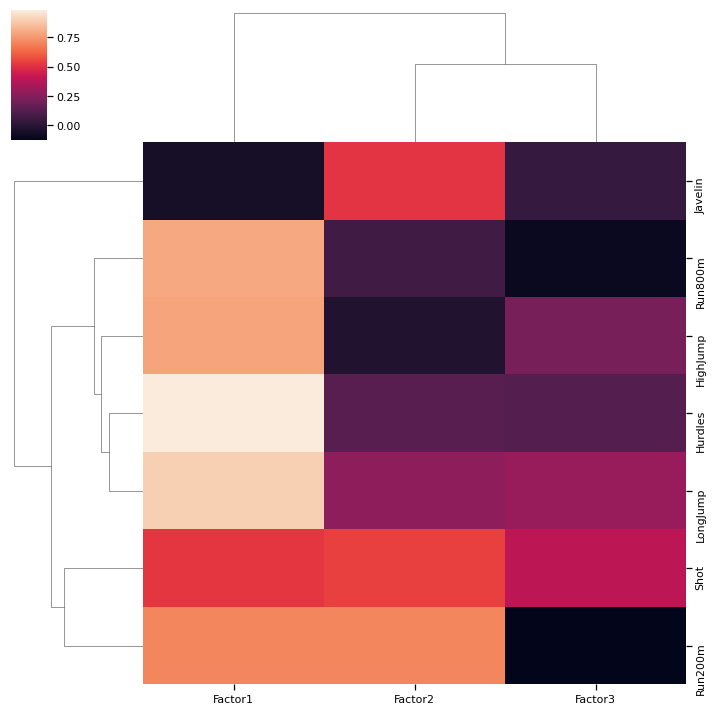

In [23]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(df_hept_norm.iloc[:,:7])

loads = fa.loadings_
loadsdf = pd.DataFrame(loads, columns=["Factor1","Factor2","Factor3"],index=df_hept_norm.columns)
print(loadsdf)
sns.clustermap(loadsdf)

communalities = fa.get_communalities()
print(communalities)

fa.get_factor_variance()

### <font color="magenta">Questions for the class:</font>

* Can you name the factors? 

## Given our experience with PCA above we might also try a two factor model.

           Factor1   Factor2
Hurdles   0.994490  0.107310
HighJump  0.796277 -0.019068
Shot      0.585003  0.504946
Run200m   0.696184  0.607394
LongJump  0.939275  0.265615
Javelin  -0.046915  0.574552
Run800m   0.758266  0.048619
[1.0005258  0.63442056 0.59719846 0.85359967 0.95278984 0.33231127
 0.57733154]


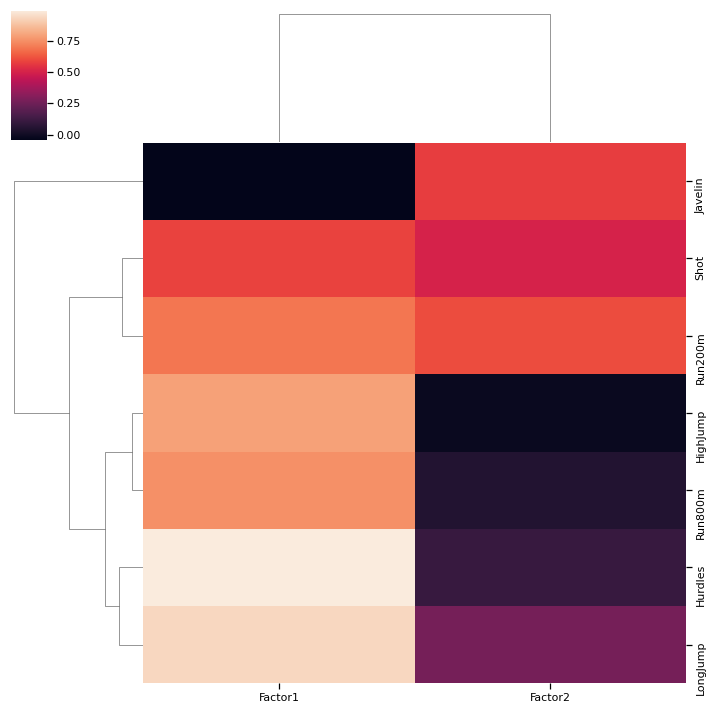

In [24]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(df_hept_norm.iloc[:,:7])

loads = fa.loadings_
loadsdf = pd.DataFrame(loads, columns=["Factor1","Factor2"],index=df_hept_norm.columns)
print(loadsdf)
sns.clustermap(loadsdf)

communalities = fa.get_communalities()
print(communalities)

## How many factors?

* If you set k too high, you will get all zeros for the additional factor

In [25]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(8, rotation='varimax')
fa.fit(df_hept_norm.iloc[:,:7])

loads = fa.loadings_
print (loads)

[[ 7.03340896e-01  5.24710347e-01  4.29491216e-01 -3.82492366e-02
   1.40993158e-01 -1.38513867e-01  0.00000000e+00]
 [ 3.48210372e-01  9.03643146e-01  1.98288214e-01 -3.41430284e-03
   5.24607634e-02  2.52221134e-03  0.00000000e+00]
 [ 2.67329238e-01  2.00395303e-01  8.23484741e-01  2.40227194e-01
   7.98753600e-02 -1.73891226e-02  0.00000000e+00]
 [ 6.23928109e-01  1.77848034e-01  4.25960471e-01  3.70045367e-01
   5.05560621e-01 -1.07904731e-02  0.00000000e+00]
 [ 5.36312096e-01  5.15768443e-01  5.76244532e-01  8.03156286e-03
   2.85282704e-01  1.66865031e-01  0.00000000e+00]
 [-1.31550054e-02 -1.70150978e-02  1.13838558e-01  7.45164581e-01
   3.96471335e-02  2.71033310e-04  0.00000000e+00]
 [ 7.42500635e-01  3.21356939e-01  1.97450095e-01 -3.95158410e-02
   5.40748240e-02  3.99390179e-02  0.00000000e+00]]


* Beyond this, there is no clear rule but there are a few things you can consider:
    * Eigenvalues of factors: Consider factors with eigenvalues >=1. Those account for as much variance as a single variable (but not a strict rule)
    * Scree Plots: We learned this before. Look for the elbow (rerun EFA with different number of factors, plot the eigenvalues on the y-axis and the number of factors on the x-axis.)
    * Variance explained
    * How meaningful are the variables?
    * Factors with simple structure



## When have we found factors with "simple" structure?

Thurstone (1947) listed five criteria: 
1. Each variable should produce at least one zero loading on some factor. 
2. Each factor should have at least as many zero loadings as there are factors. 
3. Each pair of factors should have variables with significant loadings on one and zero loadings on the other. 
4. Each pair of factors should have a large proportion of zero loadings on both factors (if > 3 factors total). 
5. Each pair of factors should have only a few complex variables. 

Source: Thurstone, L.L. (1947), Multiple Factor Analysis, U of C Press

## PCA vs EFA

* Both are variable reduction techniques:
    * Explain lots of observed variables in terms of a few hidden variables
* But they solve different optimization problems
* PCA
    * Can reduce data using a small number of principal components that account for most of the variance
    * Typically used when variables are highly correlated
    * Good as a fast, initial look at likely number of factors
    * Sensitive to scaling
    * Solution is usually a means to an end, e.g. compress the data
* EFA
    * More general and flexible than PCA in finding interesting structure
    * Identifies the number and nature of likely latent variables (factors)
    * Factors may be correlated or have specific structure
    * Not sensitive to scaling (if maximum likelihood method)
    * Solution is of interest in itself
* Considering k+1 components does not change first k PCA.. But it may change solution to EFA factors.


## Dimensionality Reduction in your projects

How will/can you use these ideas in your project? Take some time to think and fill out this following survey: https://forms.gle/zCn6E4XgEczaRN117

# Lab: Dimensionality Reduction of Products

## (make sure to import  the relevant packages --skipped here)

# 1. Bivariate Analysis (Quick Review)

This set of exercises  mostly follows the analytic procedure in the following book chapter:

> Chapman and Feit, "Reducing Data Complexity", _R for Marketing Research and Analytics_, Chapter 8, (2015).

Many of the text descriptions below are taken from this chapter. Of course, you will see example code given in python instead of R. We will use the dataset in the book, customer brand perception surveys. For exercise questions, you will work on the iris dataset.

This section involves data importing and some descriptive analysis, serving as a quick review of previous weeks.

In [ ]:
# Loads dataframe from a remote URL
df_survey = pd.read_csv('data/products.csv')
df_survey.head()

In [ ]:
# Let's print out summary information to check the data quality 
# and structure.
df_survey.describe()

In [ ]:
# Let's check how many records we have per brand.
df_survey.brand.value_counts()

Based on the above summary information, we can tell that the data are clean and are formatted appropriately.

## Data Preparation: Rescaling the Data
Let us normalize the data by computing the "[z-scores](https://en.wikipedia.org/wiki/Standard_score#Calculation_from_raw_score)" of the values. This step of normalization (rescaling) is important to PCA.

Given a column x, the z-scores of the elements in x is simply

    (x - mean(x)) / std(x)
    
where, `std` means standard deviation.

### <font color="magenta">Task1. Rescale the data</font>

In [ ]:
df_survey_norm = df_survey.copy()

## YOUR CODE HERE ##

After rescaling (normalization), the means of all columns are all technically 0, and standard deviation 1.0.

## 1.3 Bivariate Analysis of rescaled data
For initial inspection of bivariate relationships among the variables, let us create a correlation plot.

### <font color="magenta">Task2. Create a clustermap. What do you see?</font>
- Can you identify the clusters of variables from the plot?

## By-Brand Analysis
We are going combine all products from one manufacturer into a row (based on the mean score)

In [ ]:
df_bybrand = df_survey_norm.groupby('brand').mean()
df_bybrand.head()

We can see the correlations of the values across columns for `bargain/value/rebuy`, which is consistent with the correlation matrix visualization above. But it is better to formalize such kind of insights, and the remainder of this lab introduces how to do so.

# 2. Principal Component Analysis

We have demonstrated how to use principal component analysis (PCA) to do dimensionality reduction for visualization in the previous lab. Now let us look at PCA in greater details.

### <font color="magenta">Task3_a. Create a PCA model</font>

### <font color="magenta">Task3_b. Look at the variances explained by each component.  Interpret your results</font>

One way of determining the number of principal components to retain is to look at the explained variance as shown above, and drop those principal components whose explained variance is smaller than 1.

Another way is to create a __Scree Plot__ as below, and find the "elbow" point on the plotted curve.

### <font color="magenta">Task4. Generate a scree plot and answer the following question: How many components do you think we should keep? </font>

### <font color="magenta">Task5: Using the biplot code from the previous section, create a __biplot__, for this model.</font>

# 3. Exploratory Factor Analysis

### <font color="magenta">Tas6. Create a 2-factors EFA model</font>
### <font color="magenta">Task6_b. Can you describe the factors?</font>

### <font color="magenta">Tas7. Create a 3-factors EFA model</font>
### <font color="magenta">Task7_b. Can you describe the factors?</font>

### <font color="magenta">Compare the factors with the principal components. Can you find the similarity between the results?</font>